In [52]:
from pytesseract import Output

import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import csv
import os

At this point, all mapping, coordinates and needed data is parsed (if not with the previous notebooks, it is supposed so, i.e. images links are given already parsed).

Any languages could do the trick, but for continuity, python will be used to complete the task.

In [53]:
picture_ph = "../../docs/wwwroot/assets/picture.png"
name = "3"
dirName = '../websites/docs_'+name+'/'

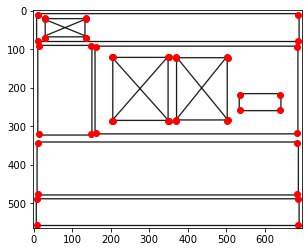

In [69]:
img = cv2.imread('../wireframes/'+ name +'.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
listCoordShapes = []
listCoords = []

i = 0
with open('../data/docs_data_shapes_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for point in row:
            if i == 0:
                i = 1
                listCoords.append(point)
                continue
            coord = point.strip('[]')
            #print(coord)
            x, y = coord.split()
            #print(type(x))
            listCoords.append((x, y))
            plt.plot(int(x), int(y), 'ro')
        listCoordShapes.append(listCoords)
        i = 0
        listCoords = []
    
plt.show()

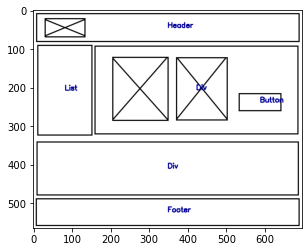

In [66]:
img = cv2.imread('../wireframes/3.png')
listMapping = []

with open('../data/docs_data_mapping_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        listMapping.append(row)
        #print(row[0], row[1])
        values = row[1].strip('[]').split()
        #print(values)
        x, y = int(values[1].strip('(,')), int(values[2].strip(')'))
        #print(x, y)
        cv2.putText(img, row[0], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (150, 0, 0), 2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
listCoordShapes

[["[['Box2' (348, 522)]]",
  ('10', '490'),
  ('10', '555'),
  ('686', '555'),
  ('686', '490')],
 ["[['Box4' (348, 409)]]",
  ('12', '343'),
  ('12', '476'),
  ('684', '476'),
  ('684', '343')],
 ["[['Box6' (422, 206)]]",
  ('162', '95'),
  ('162', '318'),
  ('683', '318'),
  ('683', '95')],
 ["[['Box8' (587, 238)]]",
  ('535', '218'),
  ('535', '258'),
  ('639', '258'),
  ('639', '218')],
 ["[['Picture9' (436, 203)]]",
  ('369', '122'),
  ('370', '121'),
  ('503', '121'),
  ('504', '122'),
  ('504', '285'),
  ('503', '286'),
  ('370', '286'),
  ('369', '285')],
 ["[['Picture14' (277, 203)]]",
  ('204', '121'),
  ('205', '120'),
  ('350', '120'),
  ('351', '121'),
  ('351', '286'),
  ('350', '287'),
  ('205', '287'),
  ('204', '286')],
 ["[['Box20' (82, 207)]]",
  ('14', '93'),
  ('14', '321'),
  ('150', '321'),
  ('150', '93')],
 ["[['Box22' (348, 45)]]",
  ('11', '11'),
  ('11', '79'),
  ('686', '79'),
  ('686', '11')],
 ["[['Picture23' (82, 45)]]",
  ('29', '21'),
  ('30', '20'),
 

In [71]:
listMapping

[['Header', "[['Box22' (348, 45)]]"],
 ['List', "[['Box20' (82, 207)]]"],
 ['Div', "[['Box6' (422, 206)]]"],
 ['Button', "[['Box8' (587, 238)]]"],
 ['Div', "[['Box4' (348, 409)]]"],
 ['Footer', "[['Box2' (348, 522)]]"]]

In [74]:
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   696
height:  564
channel: 3


## Compute ratios

In [86]:
#TODO
for CoordsShape in listCoordShapes:
    if (CoordsShape[0].find('Picture') == -1):
        print(CoordsShape[0], int(CoordsShape[2][0]) - int(CoordsShape[1][0]), int(CoordsShape[2][1]) - int(CoordsShape[1][1]))
    else:
        print(CoordsShape[0], int(CoordsShape[8][0]) - int(CoordsShape[1][0]), int(CoordsShape[8][1]) - int(CoordsShape[1][1]))

[['Box2' (348, 522)]] 0 65
[['Box4' (348, 409)]] 0 133
[['Box6' (422, 206)]] 0 223
[['Box8' (587, 238)]] 0 40
[['Picture9' (436, 203)]] 0 163
[['Picture14' (277, 203)]] 0 165
[['Box20' (82, 207)]] 0 228
[['Box22' (348, 45)]] 0 68
[['Picture23' (82, 45)]] 0 49


## Compute files/sheets

In [35]:
try:
    os.makedirs(dirName)    
    print("Directory " , dirName ,  " Created ")
except FileExistsError:
    print("Directory " , dirName ,  " already exists")  

Directory  ../websites/docs_3/  Created 


In [36]:
file = open(dirName + "index.html", "w") 
file.write("test") 
file.close() 

In [37]:
file = open(dirName + "style.css", "w") 
file.write("asd") 
file.close() 